# Введение в библиотеку Scikit-learn

In [1]:
from sklearn import preprocessing
import numpy as np
X_train = np.array(
    [[10., -10., 20], 
    [20., 0., 0.,],
    [0., 10., -10.]])

In [5]:
X_train.std()

10.657403385139377

In [6]:
X_train.mean()

4.444444444444445

In [2]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [3]:
X_transformed = scaler.transform(X_train)
X_transformed

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [4]:
X_train.std()

10.657403385139377

In [7]:
X_transformed.std()

1.0

In [8]:
X_train.mean(axis = 0)

array([10.        ,  0.        ,  3.33333333])

In [9]:
X_transformed.mean(axis = 0)

array([0., 0., 0.])

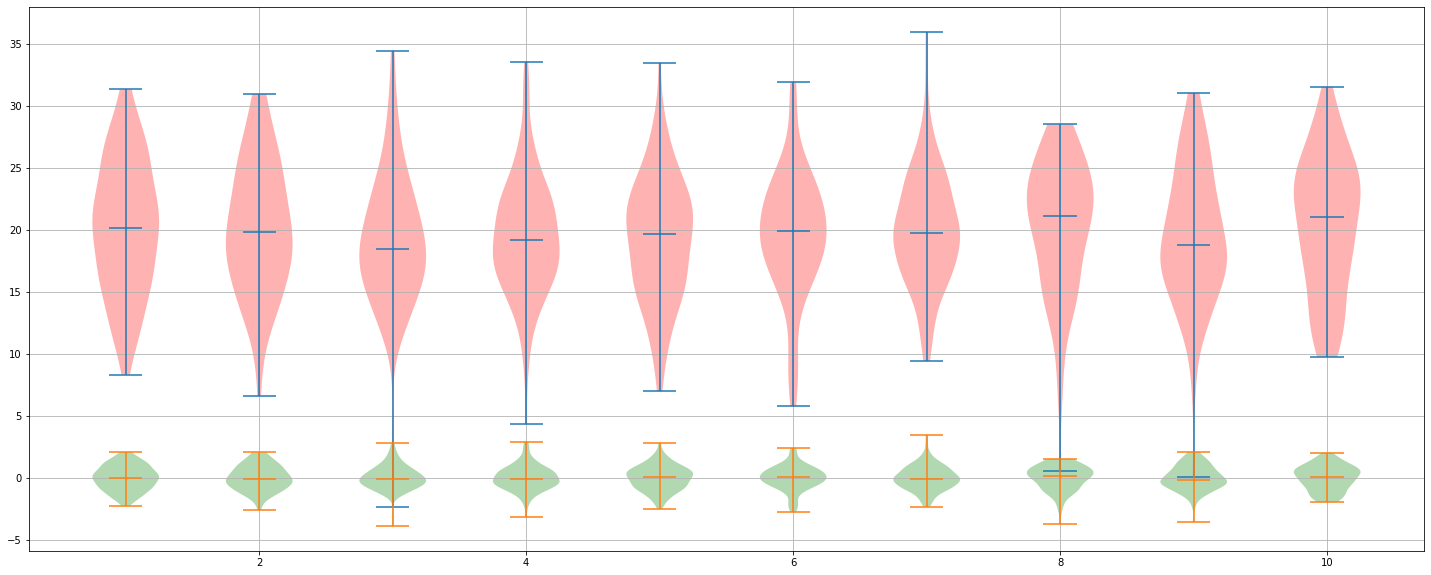

In [10]:
# больше сэмпл

import matplotlib.pyplot as plt
sample = np.random.randn(100, 10) * 5 + 20

plt.figure(figsize = (25, 10))
plt.grid()
violin_parts = plt.violinplot(sample[:, :], showmedians = True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')

scaled_sample = preprocessing.StandardScaler().fit_transform(sample)

violin_parts = plt.violinplot(scaled_sample[:, :], showmedians = True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

2. Scaling to range

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [12]:
min_max_scaler = preprocessing.MinMaxScaler((-5, 5))
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[ 0.        , -5.        ,  5.        ],
       [ 5.        ,  0.        , -1.66666667],
       [-5.        ,  5.        , -5.        ]])

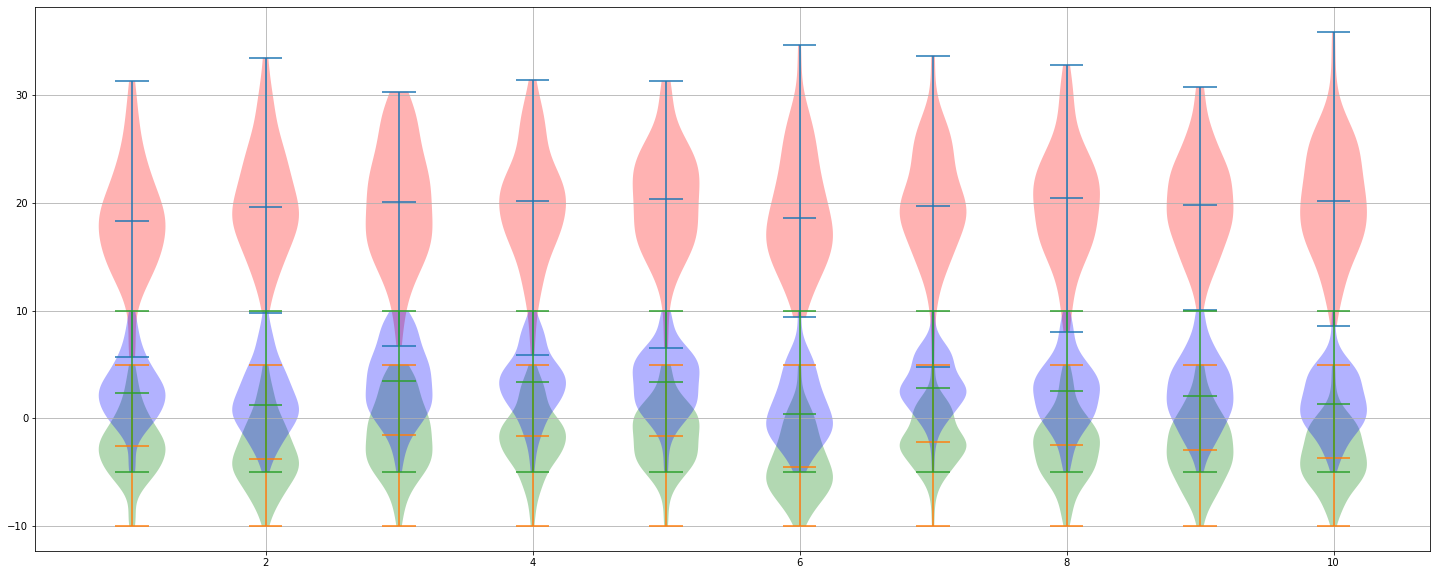

In [13]:
import matplotlib.pyplot as plt
sample = np.random.randn(100, 10) * 5 + 20

plt.figure(figsize = (25, 10))
plt.grid()
violin_parts = plt.violinplot(sample[:, :], showmedians = True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('red')

scaled_sample_1 = preprocessing.MinMaxScaler((-10, 5)).fit_transform(sample)
scaled_sample_2 = preprocessing.MinMaxScaler((-5, 10)).fit_transform(sample)

violin_parts = plt.violinplot(scaled_sample_1[:, :], showmedians = True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('green')

violin_parts = plt.violinplot(scaled_sample_2[:, :], showmedians = True)
for pc in violin_parts['bodies']:
    pc.set_facecolor('blue')

3. Mapping to a Uniform distribution

In [14]:
quantile_transformer = preprocessing.QuantileTransformer(random_state = 0)

In [15]:
sample = np.random.randn(100, 10)

In [16]:
sample_transformed = quantile_transformer.fit_transform(sample)

c:\Users\esgre\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


In [17]:
quantiles = np.arange(100)

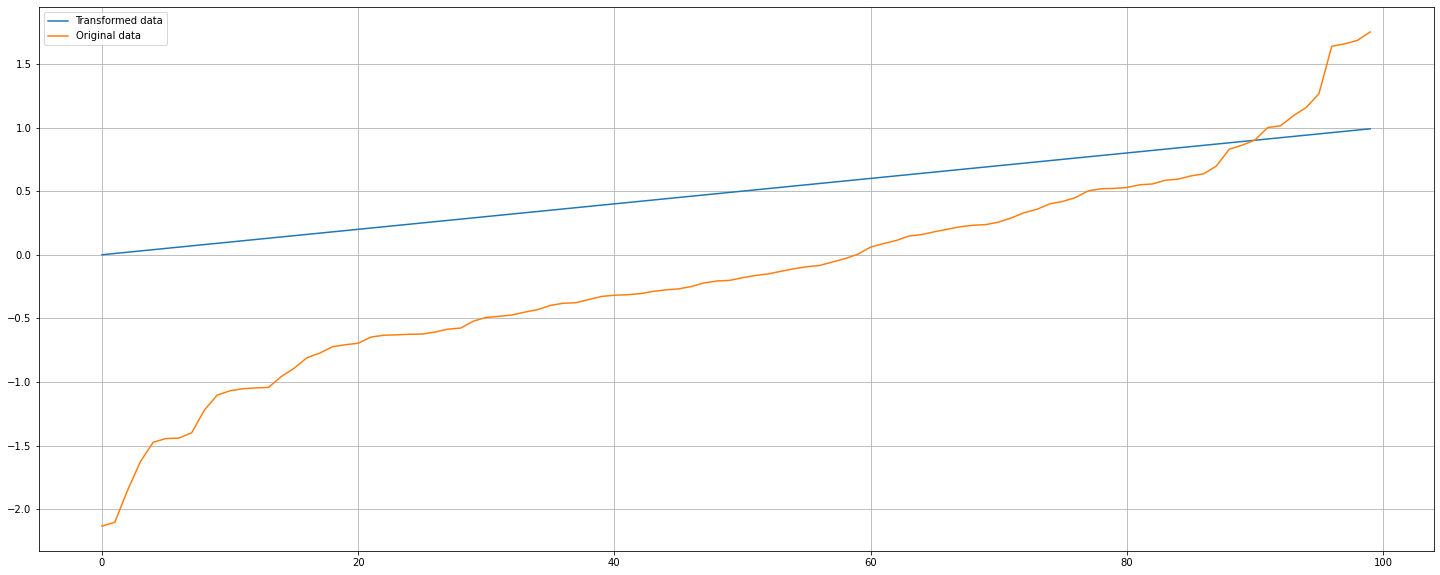

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25, 10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:, 0], quantiles), label = 'Transformed data')
plt.plot(quantiles, np.percentile(sample[:, 0], quantiles), label = 'Original data')
plt.legend()

Or normal

In [19]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state = 0)

In [20]:
sample = np.random.triangular(0, 1, 3, size = (1000, 10))

In [21]:
sample_transformed = quantile_transformer.fit_transform(sample)

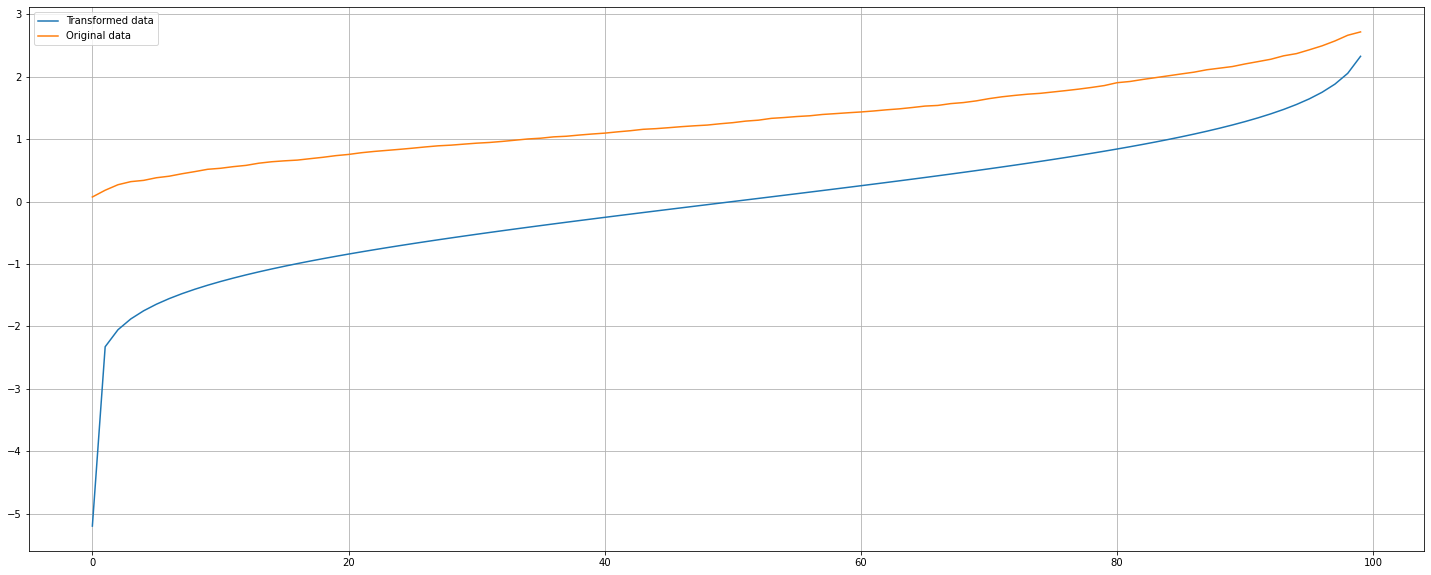

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25, 10))
plt.grid()

plt.plot(quantiles, np.percentile(sample_transformed[:, 0], quantiles), label = 'Transformed data')
plt.plot(quantiles, np.percentile(sample[:, 0], quantiles), label = 'Original data')
plt.legend()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a55a18>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a559b8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a66f40>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a73220>}

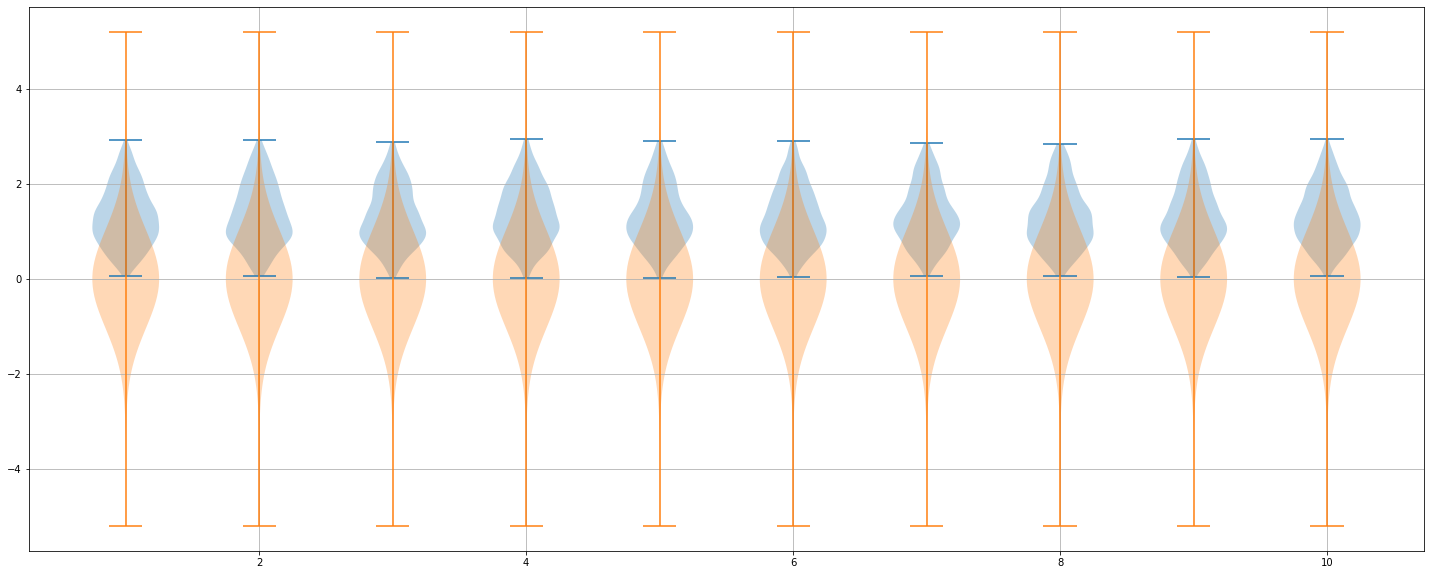

In [23]:
plt.figure(figsize = (25, 10))
plt.grid()
plt.violinplot(sample)
plt.violinplot(sample_transformed)


4. Normalize

{'bodies': [<matplotlib.collections.PolyCollection at 0x127b29e8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x127b29b8>,
 'cmins': <matplotlib.collections.LineCollection at 0x127b2d30>,
 'cbars': <matplotlib.collections.LineCollection at 0x127b2f10>}

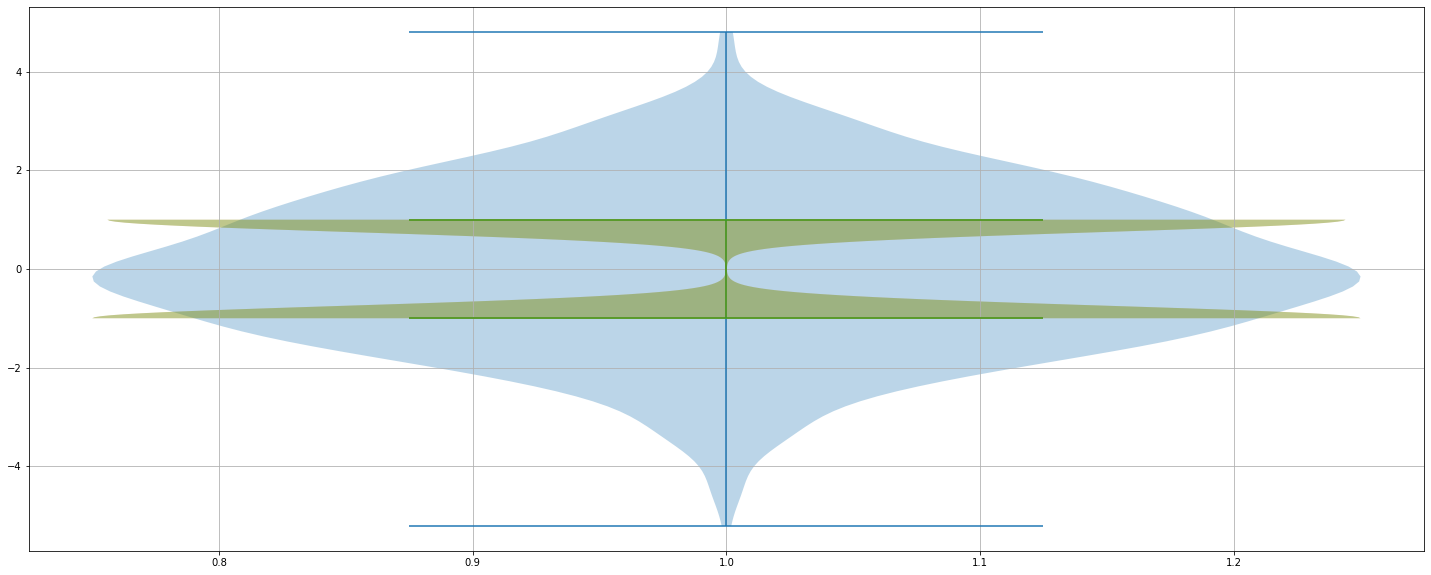

In [26]:
X = np.random.randn(1000, 1) * 1.5
normolazer_12 = preprocessing.Normalizer(norm = 'l2').fit(X)
normolazer_11 = preprocessing.Normalizer(norm = 'l1').fit(X)
X_norm_12 = normolazer_12.transform(X)
X_norm_11 = normolazer_11.transform(X)
plt.figure(figsize = (25, 10))
plt.grid()
plt.violinplot(X)
plt.violinplot(X_norm_12)
plt.violinplot(X_norm_11)

{'bodies': [<matplotlib.collections.PolyCollection at 0x12837088>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x12828fe8>,
 'cmins': <matplotlib.collections.LineCollection at 0x128373d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x128375b0>}

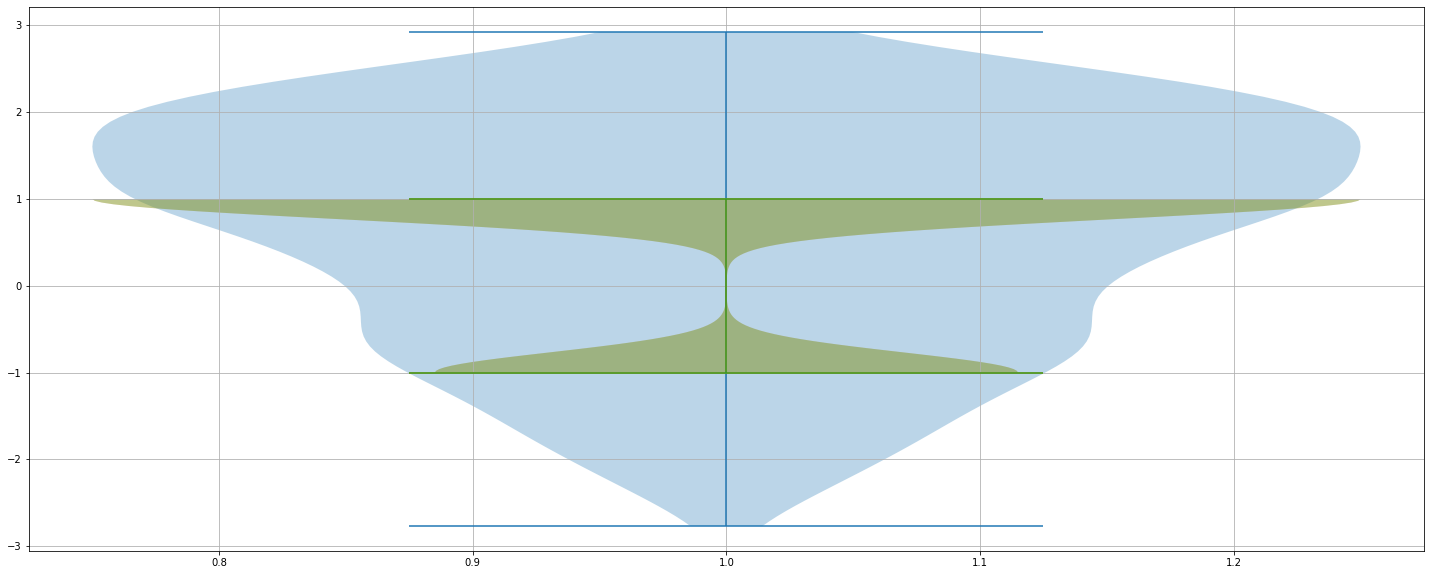

In [29]:
X = np.random.triangular(-3, 2, 3, size = (1000, 1)) #* 1.5
normolazer_12 = preprocessing.Normalizer(norm = 'l2').fit(X)
normolazer_12 = preprocessing.Normalizer(norm = 'l1').fit(X)
X_norm_12 = normolazer_12.transform(X)
X_norm_11 = normolazer_11.transform(X)
plt.figure(figsize = (25, 10))
plt.grid()
plt.violinplot(X)
plt.violinplot(X_norm_12)
plt.violinplot(X_norm_11)

5. Train test split

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
X_full = np.array([[[x, y] for y in np.linspace(-np.sqrt(9 - x ** 2), np.sqrt(9 - x ** 2), 50)] for x in np.arange(-3, 3, 0.01)])

In [34]:
X_full.shape

(600, 50, 2)

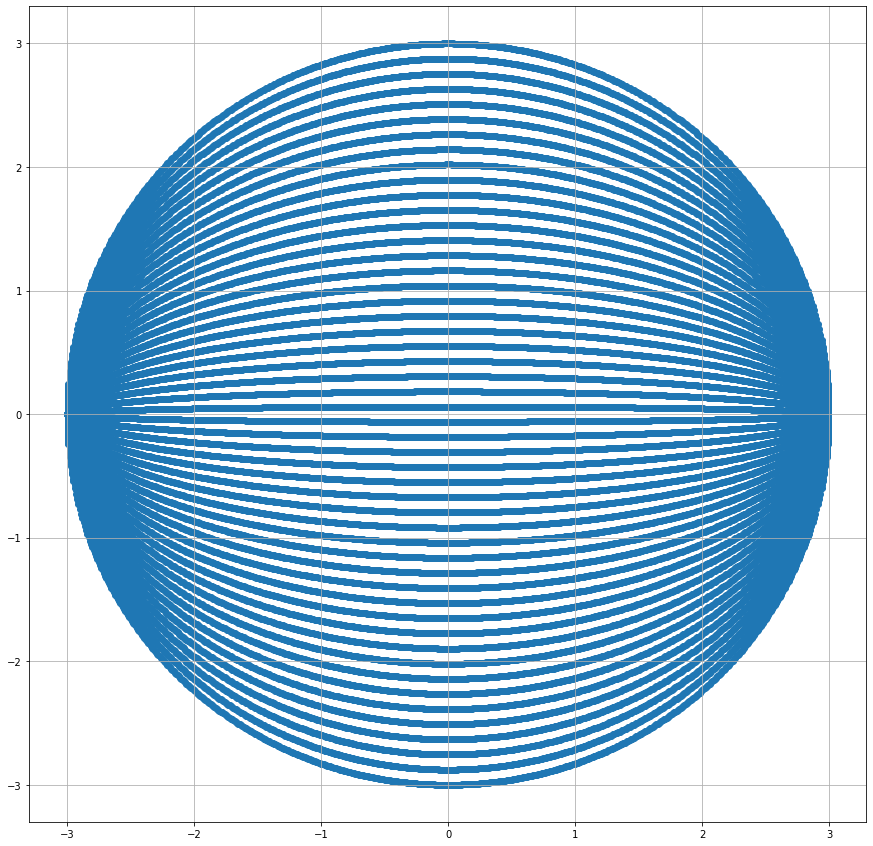

In [35]:
plt.figure(figsize = (15, 15))
plt.grid()
plt.scatter(X_full.reshape(-1, 2)[:, 0], X_full.reshape(-1, 2)[:, 1])

In [38]:
X_train, x_test, y_train, y_test = train_test_split(X_full, X_full, test_size = 0.2, shuffle = False)

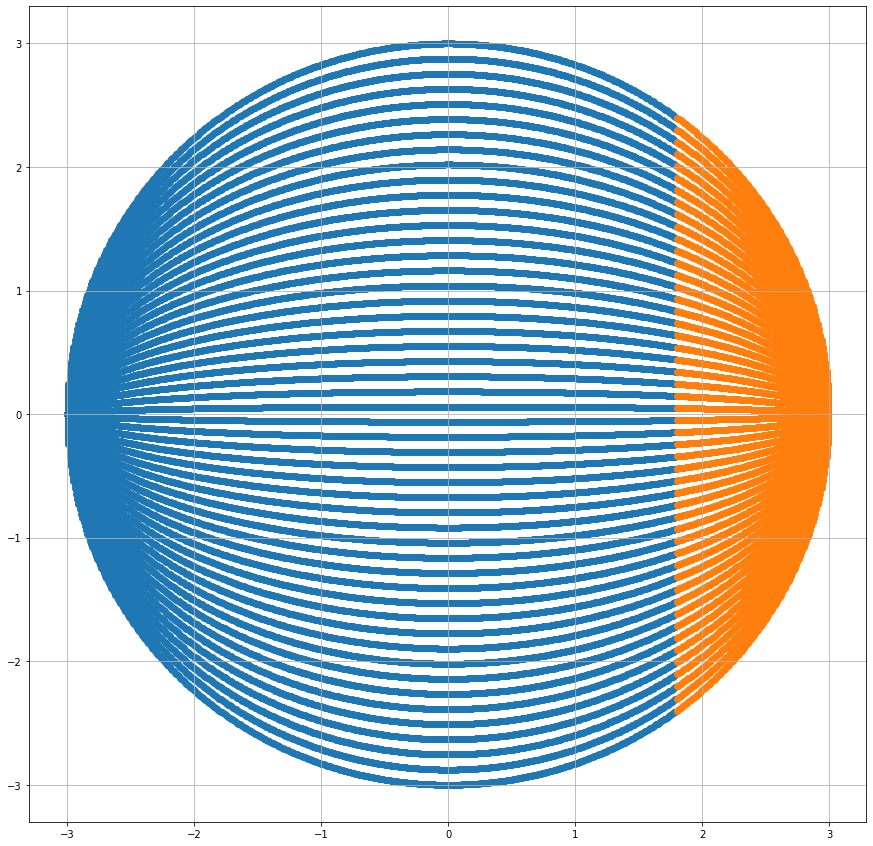

In [40]:
plt.figure(figsize = (15, 15))
plt.grid()
plt.scatter(X_train.reshape(-1, 2)[:, 0], X_train.reshape(-1, 2)[:, 1])
plt.scatter(x_test.reshape(-1, 2)[:, 0], x_test.reshape(-1, 2)[:, 1])

In [43]:
X_train, x_test, y_train, y_test = train_test_split(X_full, X_full, test_size = 0.2, shuffle = True)

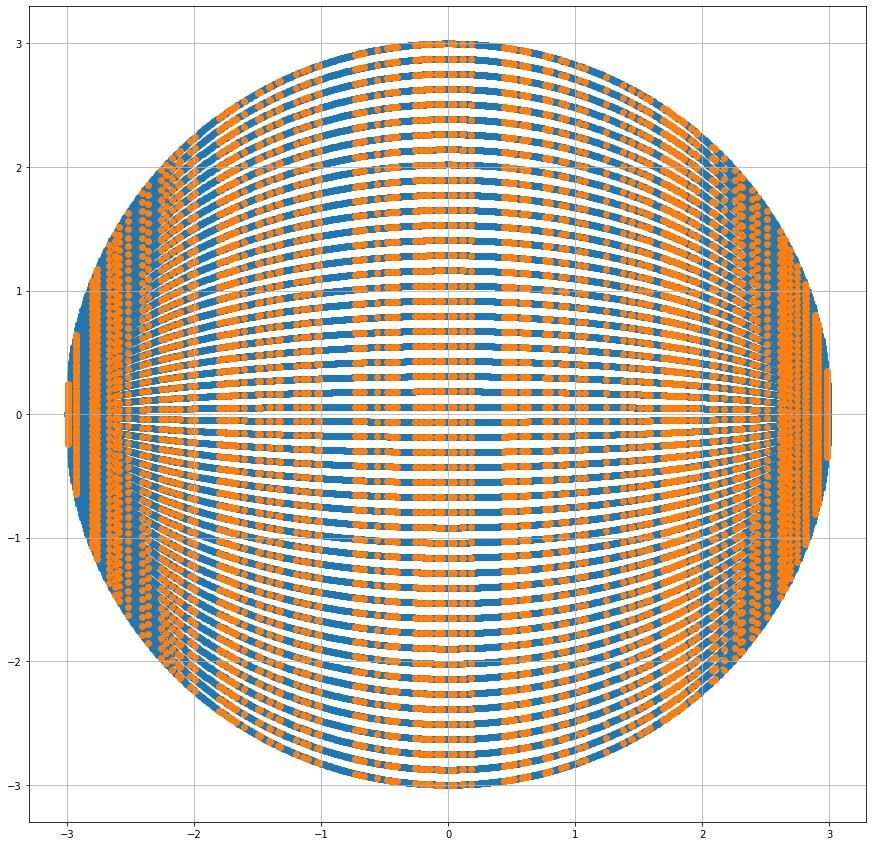

In [44]:
plt.figure(figsize = (15, 15))
plt.grid()

plt.scatter(X_train.reshape(-1, 2)[:, 0], X_train.reshape(-1, 2)[:, 1])
plt.scatter(x_test.reshape(-1, 2)[:, 0], x_test.reshape(-1, 2)[:, 1])